# 信用情報の分析
## 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。


1. Home Creditはどのような企業？
2. このコンペティションでは何を予測する？
3. それを予測することで企業が得られるメリットは何？

1. Home Creditはどのような企業？  
    新たにお金を安全に貸し借りするために、銀行口座がない人の安全な貸し借りの情報を広める企業
2. このコンペティションでは何を予測する？  
    電話情報や今までの財務情報から、返済能力がある人かどうか判断する
3. それを予測することで企業が得られるメリットは何？  
    返済能力のない人にお金を貸してしまうことを防ぎ、事業の成功の糧とする

## 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。


.head()、.info()、describe()などを使う
欠損値の有無を見る
クラスの割合がわかるグラフを描く

それぞれ結果に対する説明や考察も行ってください。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('application_train.csv')

In [2]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(307511, 122)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


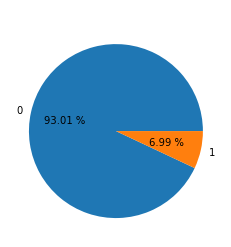

In [6]:
y = df['TARGET'].loc[0:1000] # 目的変数の作成
x = df.iloc[0:1000, 1:]
y.value_counts()
plt.title('target', c='w')
plt.pie(y.value_counts(), labels=[0, 1], autopct='%.2f %%'); # 少数第二位まで表示

In [7]:
# 欠損値の確認
pd.set_option('display.max_rows', 150)
null_count = x.isnull().sum(axis=0)
null_rate = x.isnull().sum(axis=0) / len(df)
null_table = pd.DataFrame({
    'null_count' : null_count,
    'null_rate' : null_rate
})
null_table

,null_count,null_rate
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
FLAG_OWN_REALTY,0,0.000000
CNT_CHILDREN,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,0,0.000000
AMT_GOODS_PRICE,1,0.000003


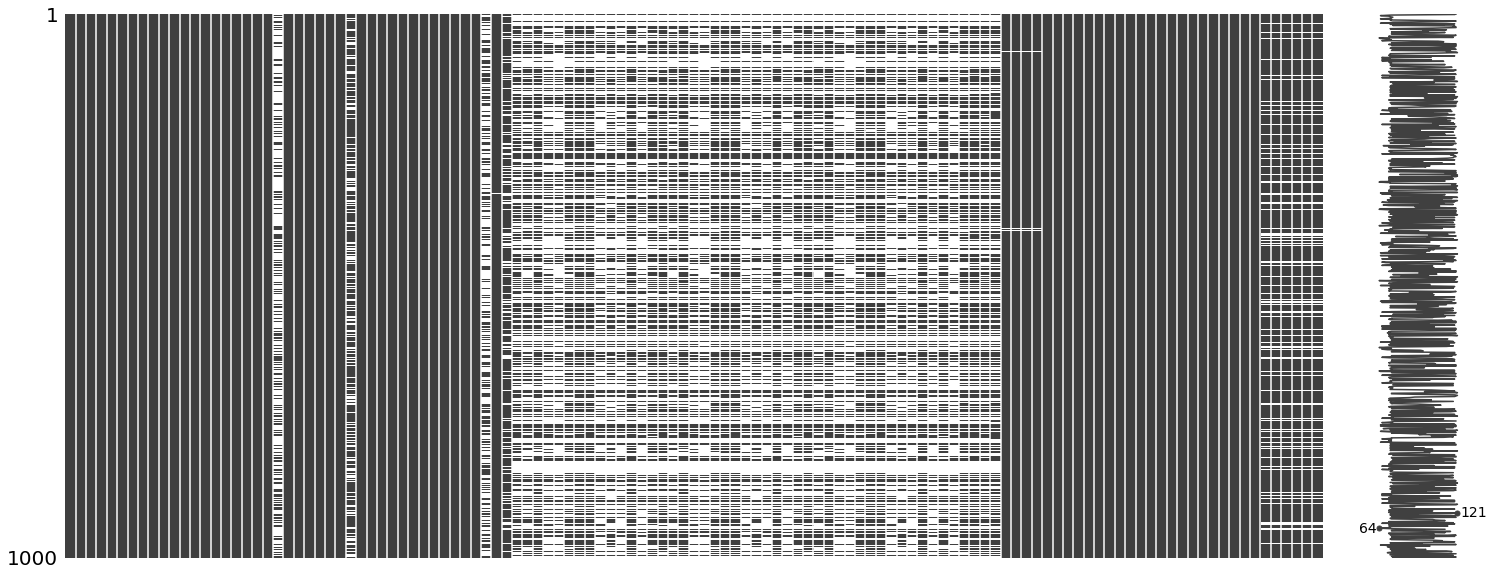

In [8]:
import missingno as msno
msno.matrix(x);

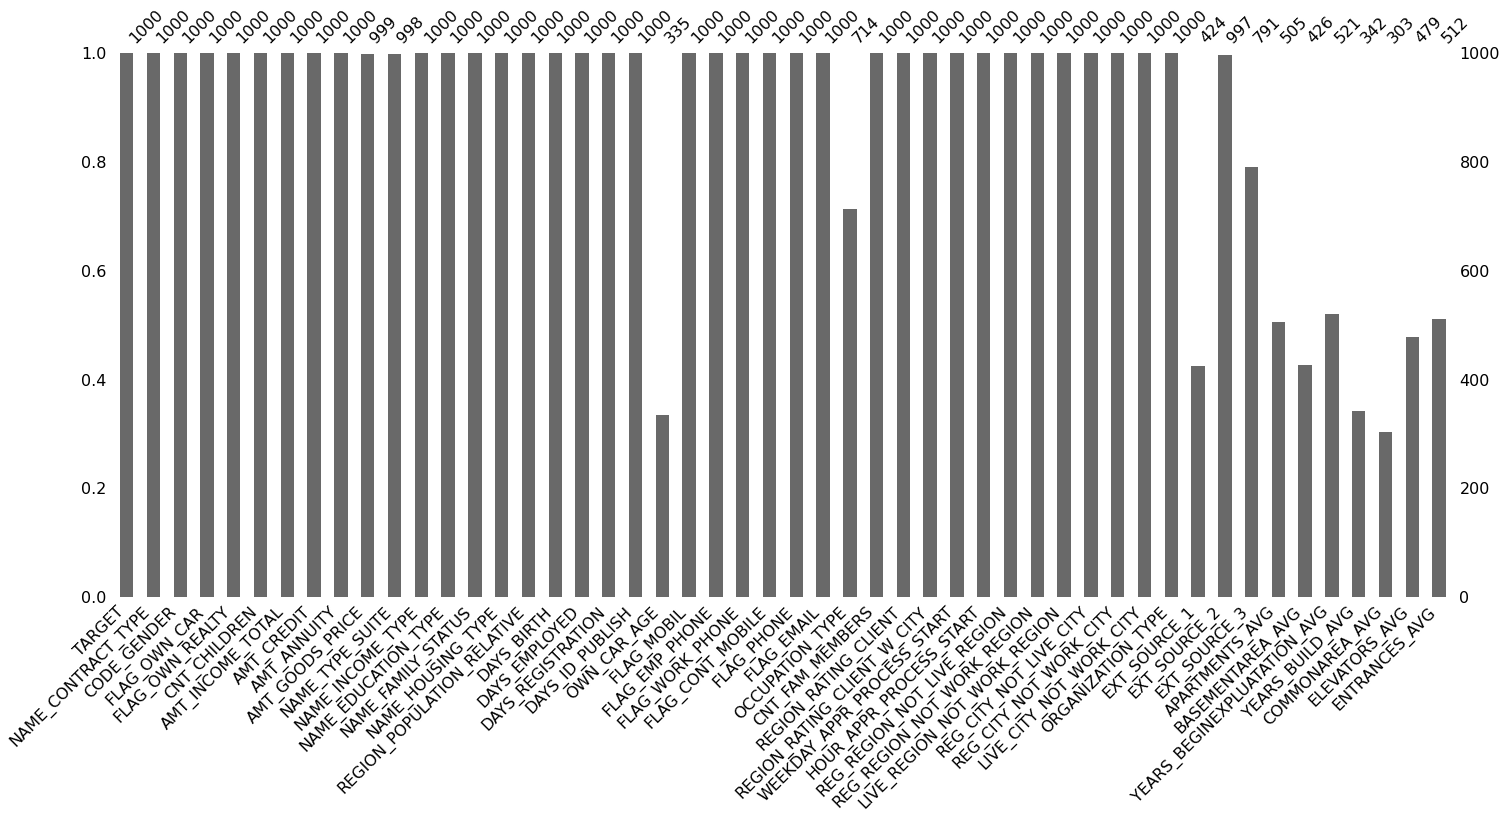

In [9]:
msno.bar(x.iloc[:, :50]);# maxが５０っぽい

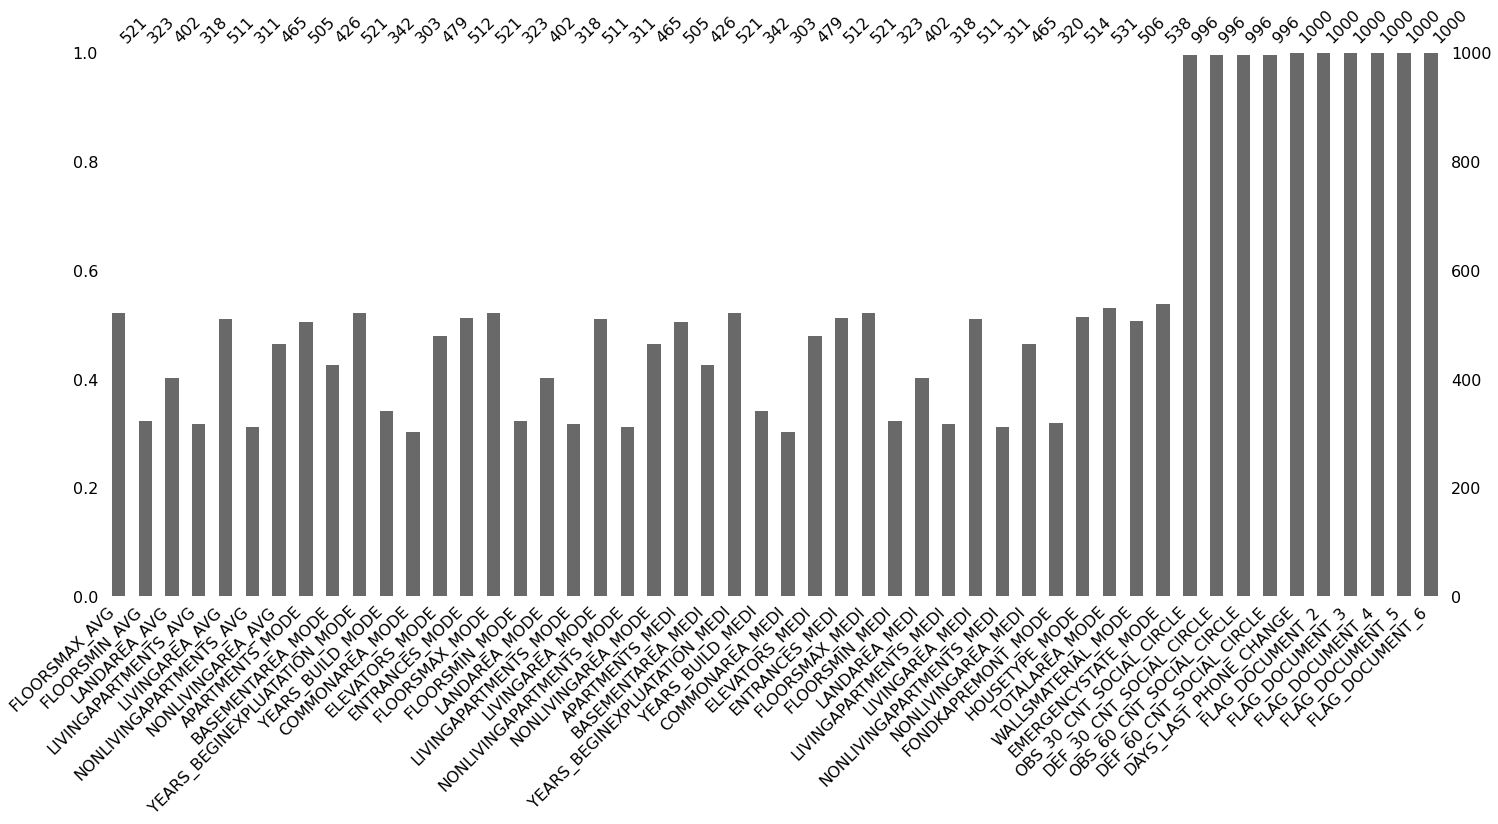

In [10]:
msno.bar(x.iloc[:, 50:100]);# maxが５０っぽい

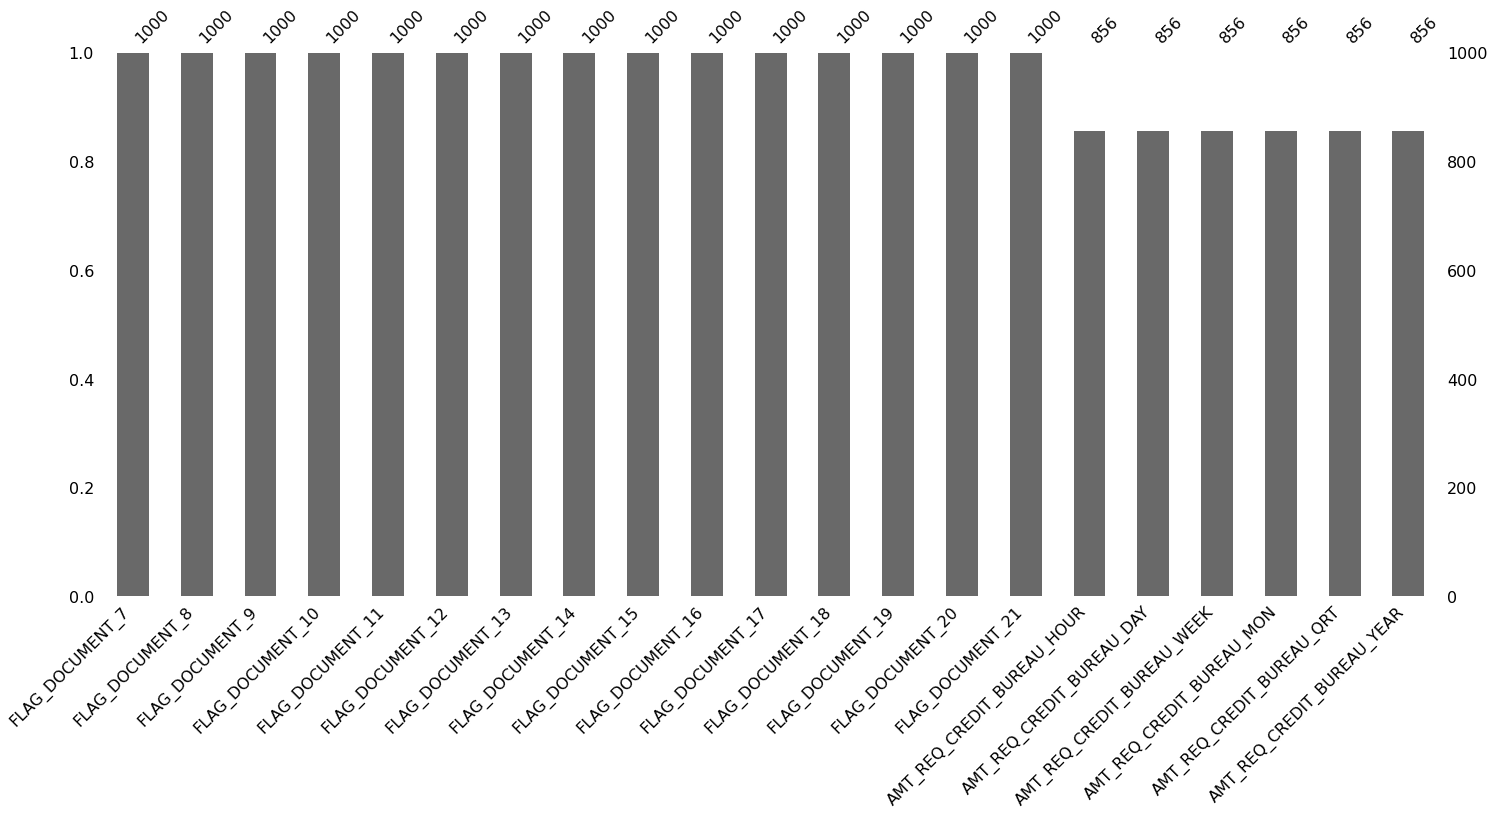

In [11]:
msno.bar(x.iloc[:, 100:]);# maxが５０っぽい

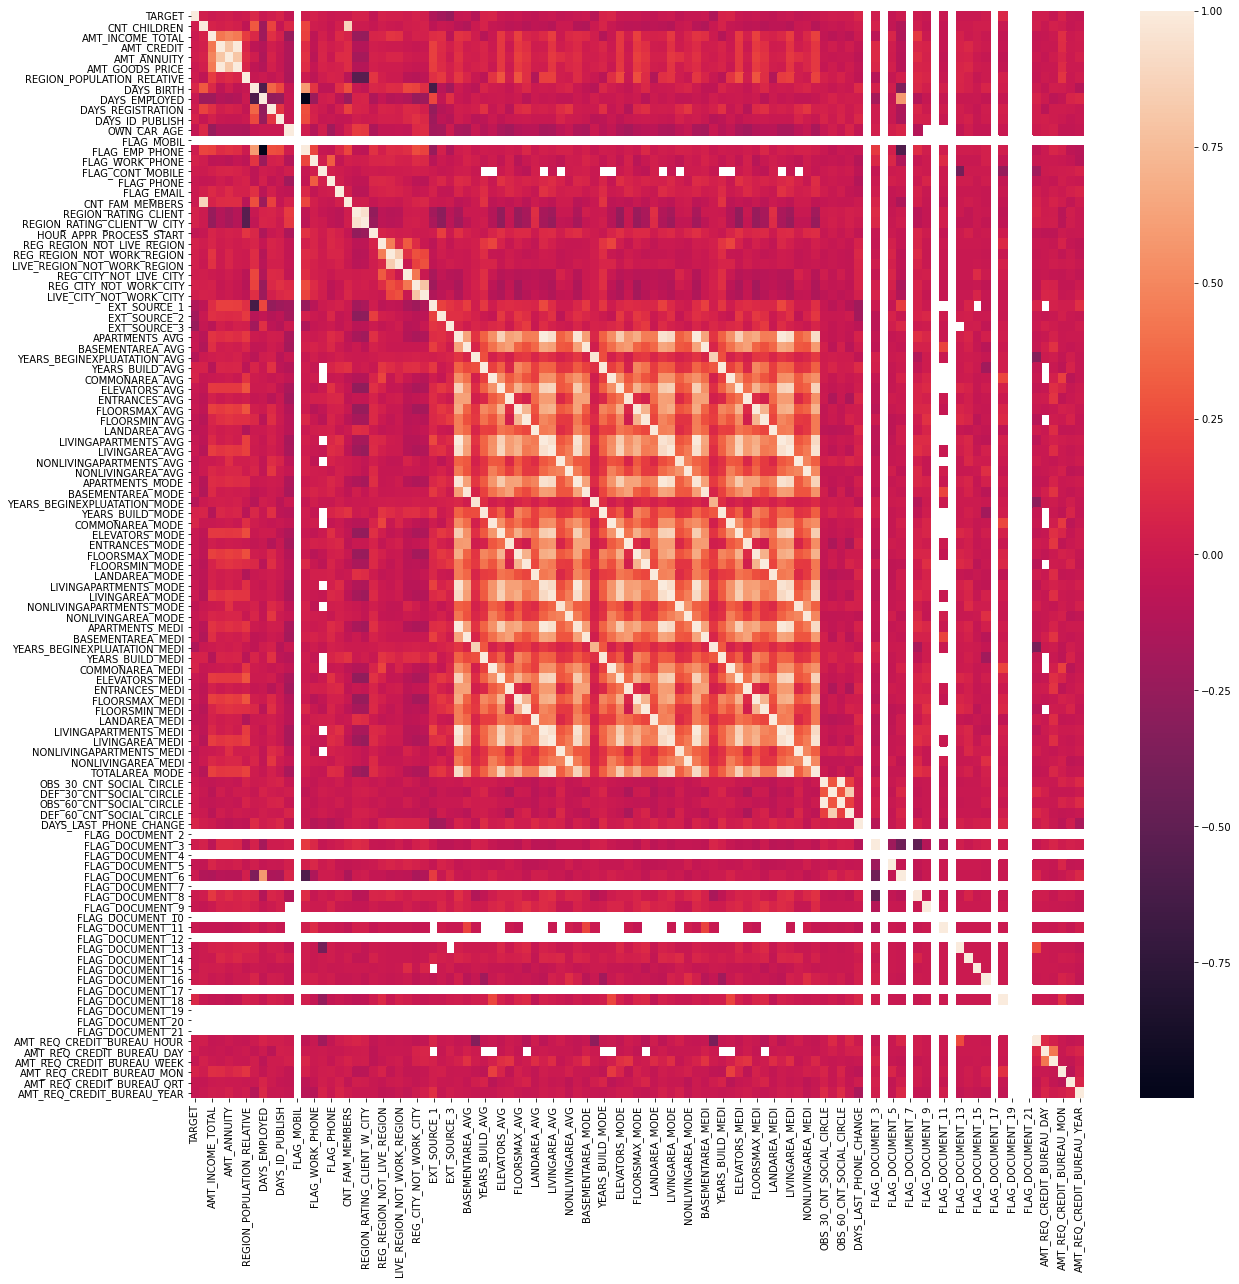

In [12]:
import seaborn as sea
plt.figure(figsize=(20, 20))
sea.heatmap(x.corr());

## 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

## 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。探索で使用する表やグラフを、考察と共に 15個以上 作成してください。


探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

In [13]:
x.iloc[:, 95:115].columns

Index(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

相関ヒートマップをみるかぎり、欠損値を含んでいるものは除いてよさそう  
また、Flagdocumentより下はデータの構造的なのを述べているので除いてよさそう  

In [14]:
x.drop(x.iloc[:, 95:115].columns, axis=1, inplace=True)
x.drop(["FLAG_MOBIL"], axis=1, inplace=True)

#元データからFLAG系を削除、元データ変更しているので実行は一度だけ

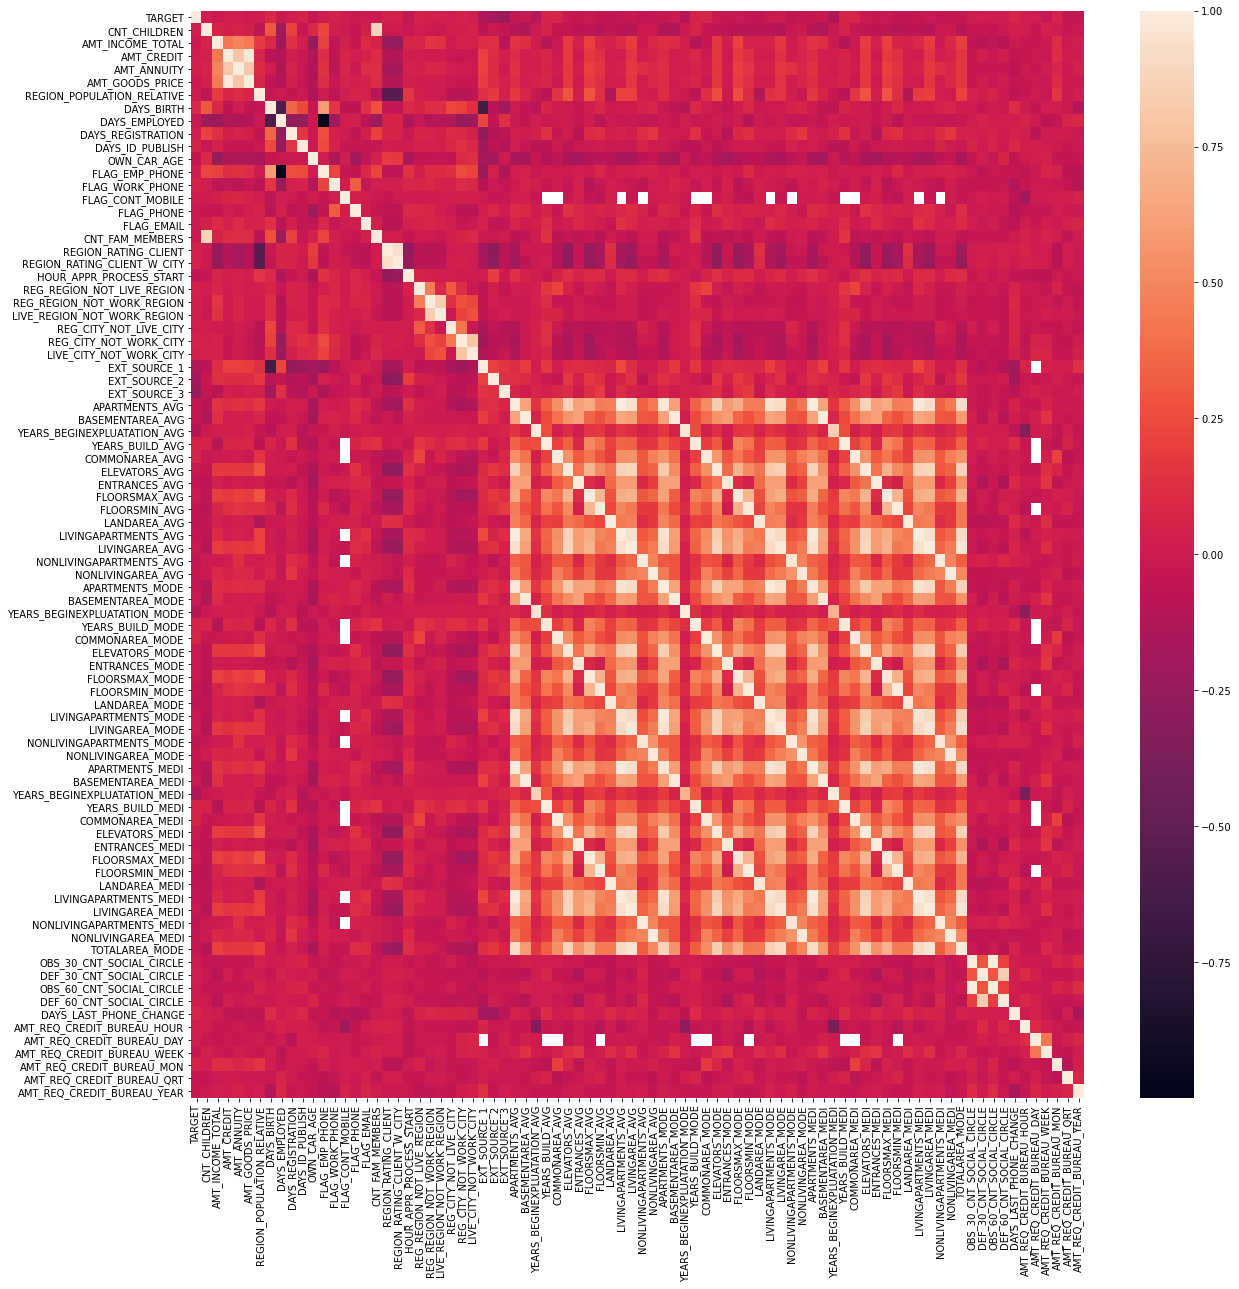

In [15]:
plt.figure(figsize=(20, 20))
sea.heatmap(x.corr());

In [16]:
# null値が5％以上の列を削除
# 一個以上か全部かのoptionしかなかったため　forを使用している
count = 0
for i in x:
    if df[i].isnull().sum() >= 50:
        count += 1
        x.drop(i, axis=1, inplace=True) # 元データの変更
print(count, x.shape)

64 (1000, 36)


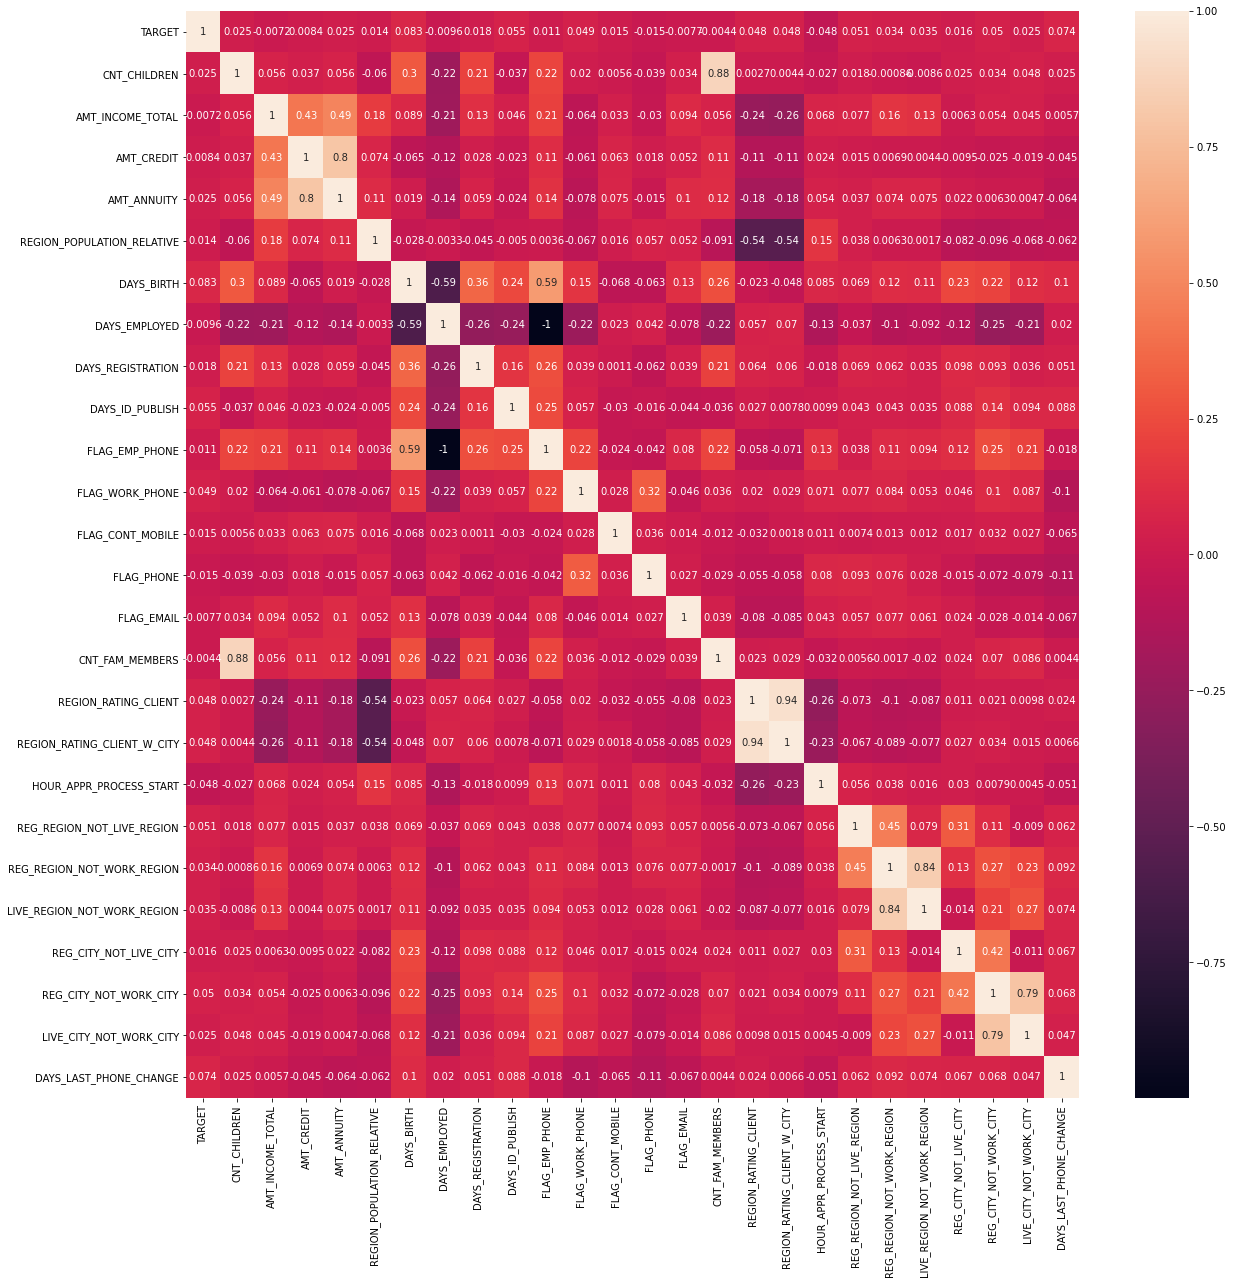

In [17]:
plt.figure(figsize=(20, 20))
sea.heatmap(x.corr(), annot=True);

欠損値を除くことでラベル数は減ってきてはいるものの、そもそも目的変数が2値分類なので相関も何もあるわけないよなぁといった結果に  
とりあえず各相関が高い特徴量は削っていっていいのかなぁと

In [18]:
#相関が高いものだけを抜き出す

x_intfloat = x.select_dtypes(include=[int, float])
correlated = []
for column1 in x_intfloat.columns:
    for column2 in x_intfloat.columns:
        if column1 != column2:
            correlation = x_intfloat[column1].corr(x_intfloat[column2])
            if correlation > 0.7 and (column2, column1) not in correlated:
                correlated.append((column1, column2))

print(correlated)

[('CNT_CHILDREN', 'CNT_FAM_MEMBERS'), ('AMT_CREDIT', 'AMT_ANNUITY'), ('REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'), ('REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION'), ('REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY')]


In [19]:
print(x['LIVE_REGION_NOT_WORK_REGION'].value_counts())
print(x['REG_REGION_NOT_WORK_REGION'].value_counts())

0    955
1     45
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64
0    943
1     57
Name: REG_REGION_NOT_WORK_REGION, dtype: int64


- 'CNT_CHILDREN', 'CNT_FAM_MEMBERS'  
    子供の数と家族の数  
    同じ特徴量なのでどちらかでよさそう  
    
- 'AMT_CREDIT', 'AMT_ANNUITY'
    最高貸付額と年金ローン  
    アメリカでは個人で年金を作成することができ、最初に購入した金額を毎年あるいは毎月受け取る仕組み  
    多分毎月定額が入る顧客には高い金額貸し付けられる様になってるみたいな事かな  
    片方でよさそう  

- 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'  
    顧客がどこに住んでるか、と都市を考慮にいれるかの違い  
    よくわからないけど近くに都会があったらレートをあげるみたいなことかな  
    
- 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION'  
    REG_REGION_NOT_WORK_REGION : 職場と住所が地域レベルで同じかどうかのフラグ  
    LIVE_REGION_NOT_WORK_REGION : 連絡先の住所が仕事先の住所かどうかのフラグ   
    返済に関係ある感覚はないけど近く住んでる人が連絡先を仕事先にしてる可能性は高そう  
    
- 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'  
    上と同じ  
    cityレベルで判断してるだけ  
    
'CNT_CHILDREN', 'AMT_ANNUITY', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'は削除

In [20]:
x.drop(['CNT_CHILDREN', 'AMT_ANNUITY', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'], axis=1, inplace=True)

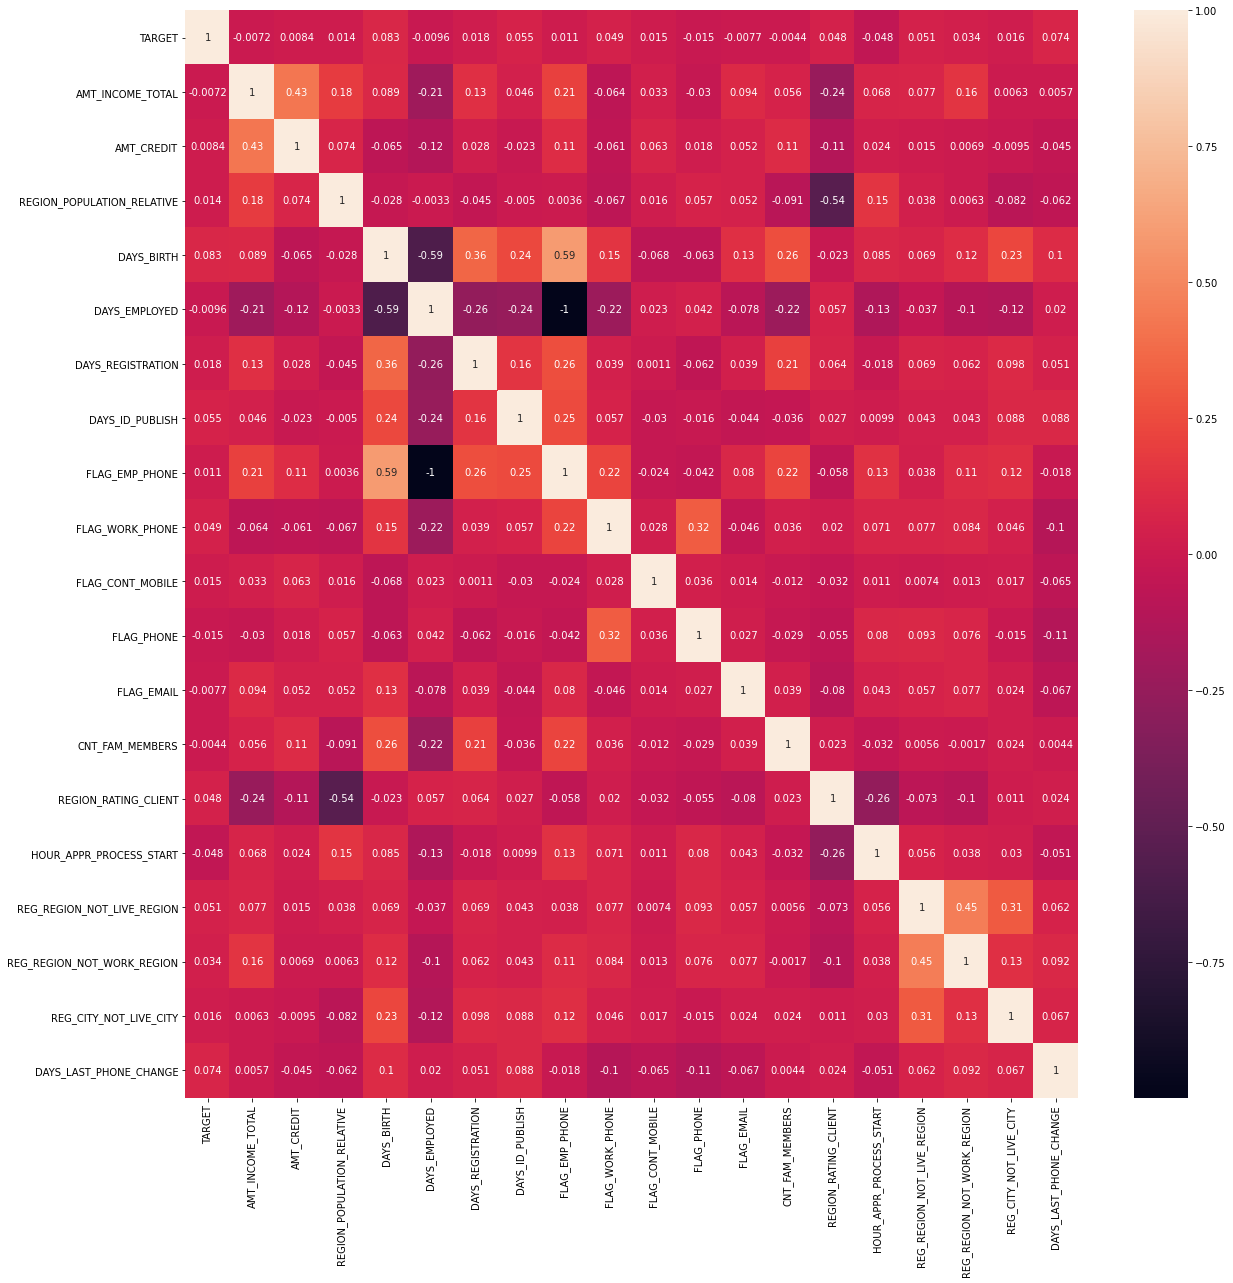

In [21]:
plt.figure(figsize=(20, 20))
sea.heatmap(x.corr(), annot=True);

相関が-1のDAYS_EMPLOYEDとFLAG_EMP_PHONEは削っていいはずなので削る

In [22]:
x.drop(['FLAG_EMP_PHONE'], axis=1, inplace=True)

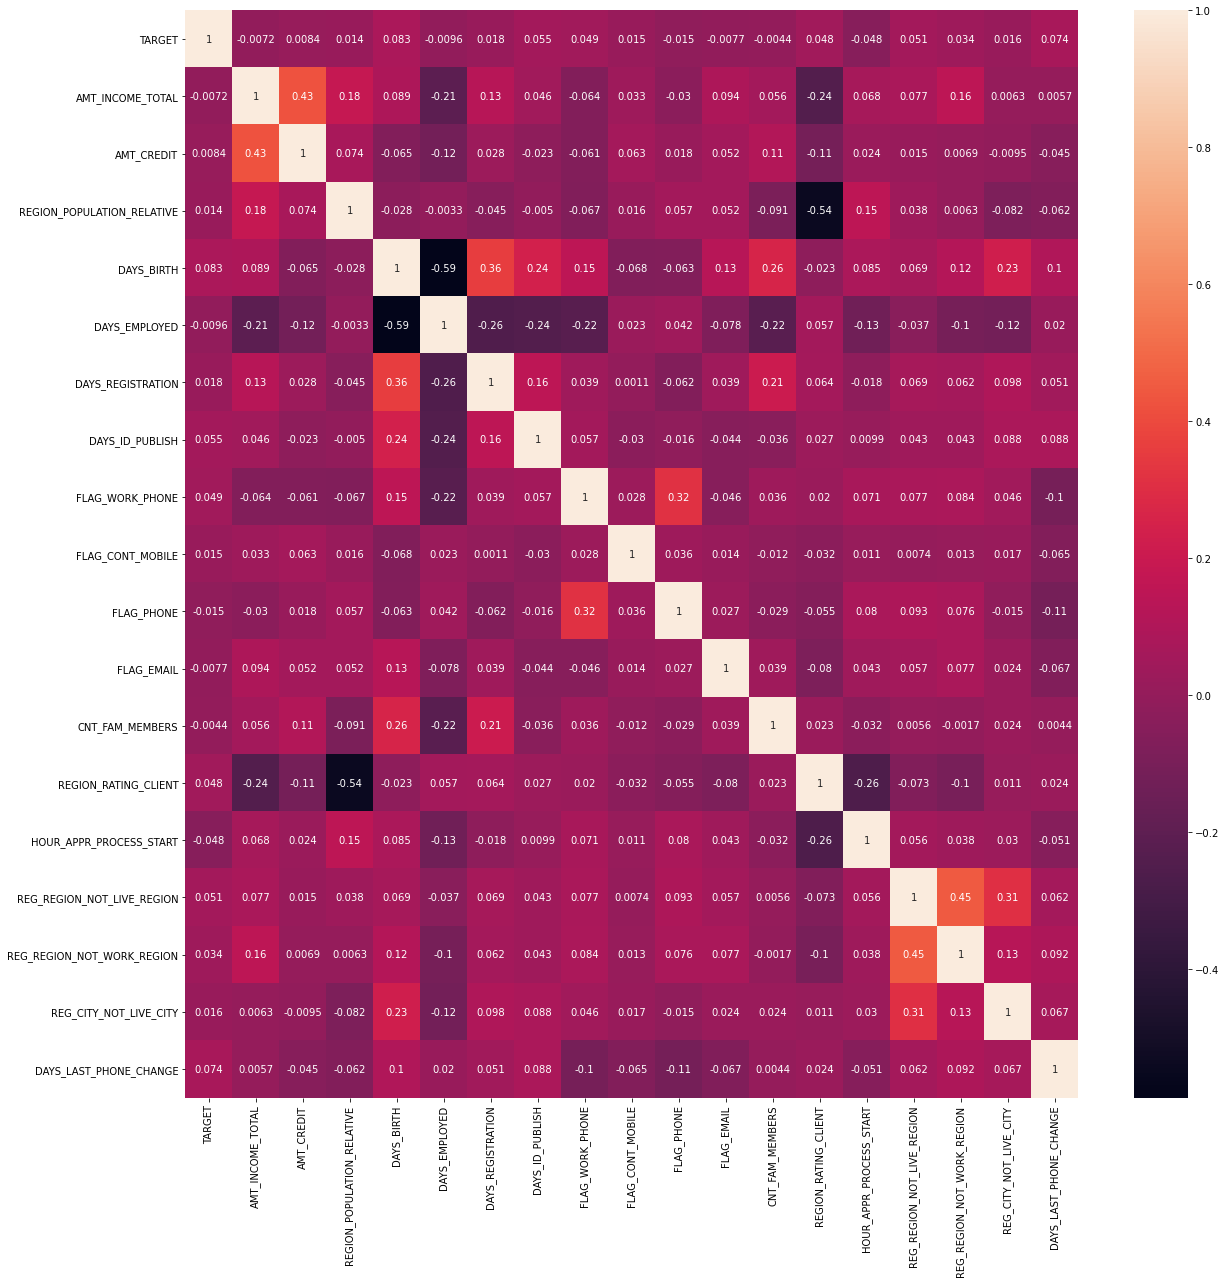

In [23]:
plt.figure(figsize=(20, 20))
sea.heatmap(x.corr(), annot=True);

In [24]:
x.shape

(1000, 29)

In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TARGET                      1000 non-null   int64  
 1   NAME_CONTRACT_TYPE          1000 non-null   object 
 2   CODE_GENDER                 1000 non-null   object 
 3   FLAG_OWN_CAR                1000 non-null   object 
 4   FLAG_OWN_REALTY             1000 non-null   object 
 5   AMT_INCOME_TOTAL            1000 non-null   float64
 6   AMT_CREDIT                  1000 non-null   float64
 7   NAME_INCOME_TYPE            1000 non-null   object 
 8   NAME_EDUCATION_TYPE         1000 non-null   object 
 9   NAME_FAMILY_STATUS          1000 non-null   object 
 10  NAME_HOUSING_TYPE           1000 non-null   object 
 11  REGION_POPULATION_RELATIVE  1000 non-null   float64
 12  DAYS_BIRTH                  1000 non-null   int64  
 13  DAYS_EMPLOYED               1000 n

今回はこのデータで分析していく
数値データと分類データに分ける作業

In [26]:
# 絶対もっといいやり方がある
for i in x.columns:
    print(x[i].value_counts())

0    930
1     70
Name: TARGET, dtype: int64
Cash loans         903
Revolving loans     97
Name: NAME_CONTRACT_TYPE, dtype: int64
F    644
M    356
Name: CODE_GENDER, dtype: int64
N    665
Y    335
Name: FLAG_OWN_CAR, dtype: int64
Y    707
N    293
Name: FLAG_OWN_REALTY, dtype: int64
112500.000    120
135000.000    106
157500.000     87
180000.000     76
90000.000      69
225000.000     68
202500.000     54
67500.000      38
270000.000     28
315000.000     22
81000.000      22
247500.000     19
450000.000     17
121500.000     16
99000.000      14
117000.000     13
360000.000     13
126000.000     12
292500.000     11
108000.000     11
144000.000     11
54000.000       8
171000.000      8
76500.000       7
103500.000      7
216000.000      6
540000.000      6
63000.000       6
337500.000      6
405000.000      5
211500.000      5
58500.000       5
166500.000      4
45000.000       4
189000.000      4
94500.000       4
153000.000      4
162000.000      4
49500.000       4
85500.000    

### データ仕分け
数値データ　8項目
- AMT_INCOME_TOTAL
- AMT_CREDIT
- REGION_POPULATION_RELATIVE
- DAYS_BIRTH
- DAYS_EMPLOYED
- DAYS_REGISTRATION
- DAYS_ID_PUBLISH
- DAYS_LAST_PHONE_CHANGE  

分類データ 20項目
- NAME_CONTRACT_TYPE
- CODE_GENDER
- FLAG_OWN_CAR
- FLAG_OWN_REALTY
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS
- NAME_HOUSING_TYPE
- FLAG_WORK_PHONE
- FLAG_CONT_MOBILE
- FLAG_PHONE
- FLAG_EMAIL
- CNT_FAM_MEMBERS
- REGION_RATING_CLIENT
- WEEKDAY_APPR_PROCESS_START
- HOUR_APPR_PROCESS_START
- REG_REGION_NOT_LIVE_REGION
- REG_REGION_NOT_WORK_REGION
- REG_CITY_NOT_LIVE_CITY
- ORGANIZATION_TYPE

### 目的変数

In [27]:
y.value_counts()

0    931
1     70
Name: TARGET, dtype: int64

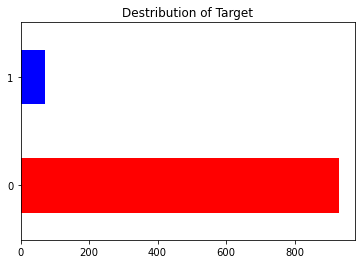

In [28]:
plt.title('Destribution of Target')
y.value_counts().plot.barh(color=['r', 'b']);

targetが１の人が返済能力がない人
全体の7%

REG_CITY_NOT_LIVE_CITY### 分類データ

20項目
- NAME_CONTRACT_TYPE
- CODE_GENDER
- FLAG_OWN_CAR
- FLAG_OWN_REALTY
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS
- NAME_HOUSING_TYPE
- FLAG_WORK_PHONE
- FLAG_CONT_MOBILE
- FLAG_PHONE
- FLAG_EMAIL
- CNT_FAM_MEMBERS
- REGION_RATING_CLIENT
- WEEKDAY_APPR_PROCESS_START
- HOUR_APPR_PROCESS_START
- REG_REGION_NOT_LIVE_REGION
- REG_REGION_NOT_WORK_REGION
- REG_CITY_NOT_LIVE_CITY
- ORGANIZATION_TYPE


#### NAME_CONTRACT_TYPE

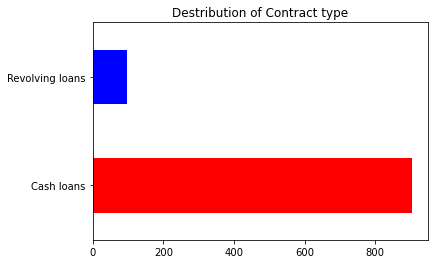

In [43]:
plt.title('Destribution of Contract type')
x['NAME_CONTRACT_TYPE'].value_counts().plot.barh(color=['r', 'b']);

In [45]:
x.groupby('TARGET')['NAME_CONTRACT_TYPE'].value_counts()

TARGET  NAME_CONTRACT_TYPE
0       Cash loans            837
        Revolving loans        93
1       Cash loans             66
        Revolving loans         4
Name: NAME_CONTRACT_TYPE, dtype: int64

In [50]:
x.groupby('TARGET')['NAME_CONTRACT_TYPE'].value_counts().unstack()

NAME_CONTRACT_TYPE,Cash loans,Revolving loans
TARGET,,
0,837,93
1,66,4


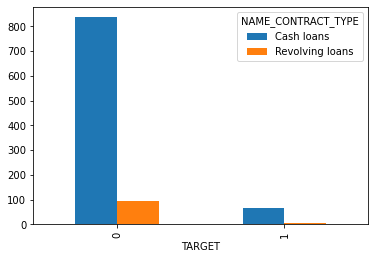

In [51]:
x.groupby('TARGET')['NAME_CONTRACT_TYPE'].value_counts().unstack().plot.bar();

cashが8倍ほど高い結果となった
比率は大きく変化しない

#### CODE_GENDER

CODE_GENDER,F,M
TARGET,,
0,608,322
1,36,34


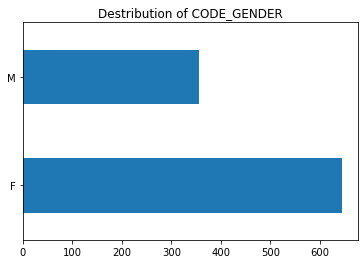

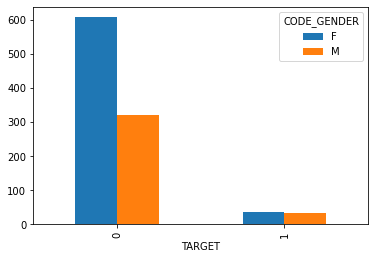

In [65]:
plt.title('Destribution of CODE_GENDER')
x['CODE_GENDER'].value_counts().plot.barh();
display(x.groupby('TARGET')['CODE_GENDER'].value_counts().unstack())
x.groupby('TARGET')['CODE_GENDER'].value_counts().unstack().plot.bar();

tagetが０の人の男女比は二倍ほどの差があるのに対し、１の人はほぼ差がない。  
サンプル誤差か、あるいは傾向があるのか..興味深い

#### FLAG_OWN_CAR

FLAG_OWN_CAR,N,Y
TARGET,,
0,615,315
1,50,20


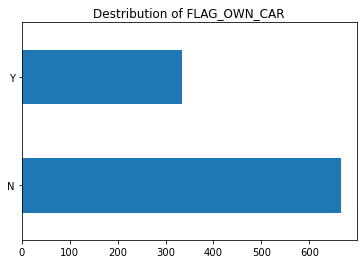

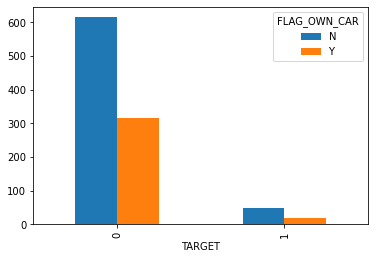

In [68]:
plt.title('Destribution of FLAG_OWN_CAR')
x['FLAG_OWN_CAR'].value_counts().plot.barh();
display(x.groupby('TARGET')['FLAG_OWN_CAR'].value_counts().unstack())
x.groupby('TARGET')['FLAG_OWN_CAR'].value_counts().unstack().plot.bar();

元比率と変わらない結果となった  
アメリカって車社会だとおもってた...

#### FLAG_OWN_REALTY

FLAG_OWN_REALTY,N,Y
TARGET,,
0,273,657
1,20,50


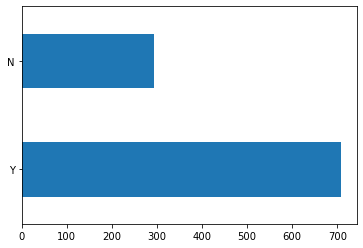

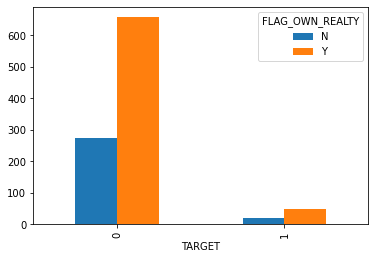

In [69]:
x['FLAG_OWN_REALTY'].value_counts().plot.barh();
display(x.groupby('TARGET')['FLAG_OWN_REALTY'].value_counts().unstack())
x.groupby('TARGET')['FLAG_OWN_REALTY'].value_counts().unstack().plot.bar();

自分の家か、アパート(flag)かの関係  
元グラフと同じ比率

#### NAME_INCOME_TYPE

NAME_INCOME_TYPE,Commercial associate,Pensioner,State servant,Working
TARGET,,,,
0,233,148,60,489
1,21,10,2,37


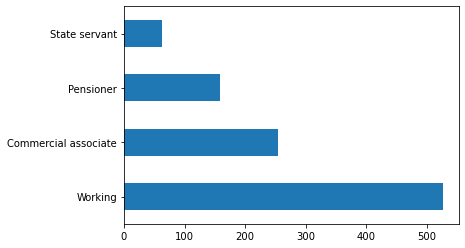

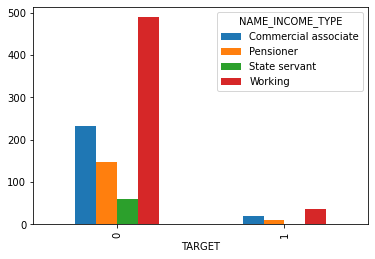

In [66]:
x['NAME_INCOME_TYPE'].value_counts().plot.barh();
display(x.groupby('TARGET')['NAME_INCOME_TYPE'].value_counts().unstack())
x.groupby('TARGET')['NAME_INCOME_TYPE'].value_counts().unstack().plot.bar();

仕事がある人>商業関係者>年金者>無職  
特に元比率と変わらなかったが普通変わりそうなので注意

#### NAME_EDUCATION_TYPE

NAME_EDUCATION_TYPE,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
TARGET,,,,
0,250.0,27.0,9.0,644.0
1,9.0,2.0,NaN,59.0


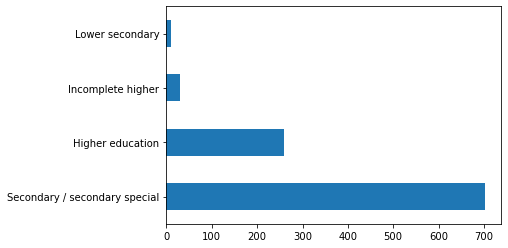

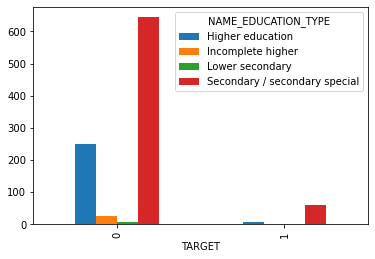

In [70]:
x['NAME_EDUCATION_TYPE'].value_counts().plot.barh();
display(x.groupby('TARGET')['NAME_EDUCATION_TYPE'].value_counts().unstack())
x.groupby('TARGET')['NAME_EDUCATION_TYPE'].value_counts().unstack().plot.bar();

最終学歴　サンプルが少なすぎてっていう感じではある
中卒最終学歴がおおいんだなぁと


#### NAME_FAMILY_STATUS

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Widow
TARGET,,,,,
0,96,582,56,142,54
1,10,35,5,15,5


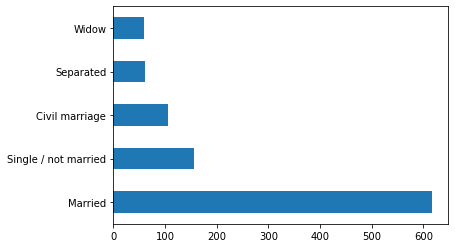

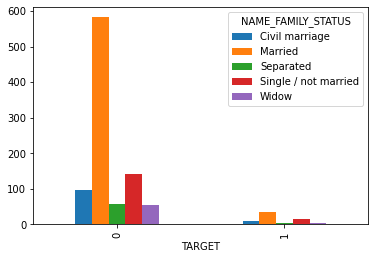

In [72]:
x['NAME_FAMILY_STATUS'].value_counts().plot.barh();
display(x.groupby('TARGET')['NAME_FAMILY_STATUS'].value_counts().unstack())
x.groupby('TARGET')['NAME_FAMILY_STATUS'].value_counts().unstack().plot.bar();

結婚率は元比率と大きく違う結果となった  
未婚の人が弾かれてる率高い

#### NAME_HOUSING_TYPE

NAME_HOUSING_TYPE,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
TARGET,,,,,,
0,3.0,843.0,31.0,6.0,12.0,35.0
1,NaN,66.0,1.0,NaN,NaN,3.0


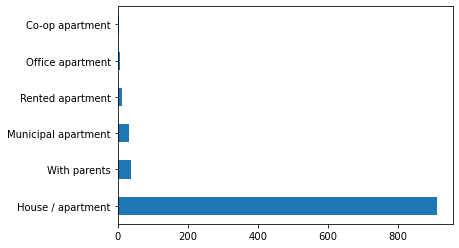

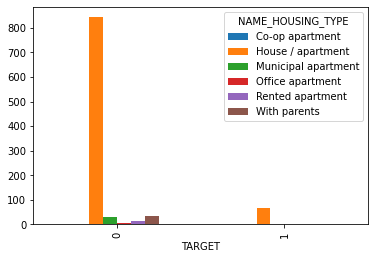

In [71]:
x['NAME_HOUSING_TYPE'].value_counts().plot.barh();
display(x.groupby('TARGET')['NAME_HOUSING_TYPE'].value_counts().unstack())
x.groupby('TARGET')['NAME_HOUSING_TYPE'].value_counts().unstack().plot.bar();

サンプル数少なくてなんとも、一軒家率が高い

#### FLAG_WORK_PHONE

FLAG_WORK_PHONE,0,1
TARGET,,
0,738,192
1,50,20


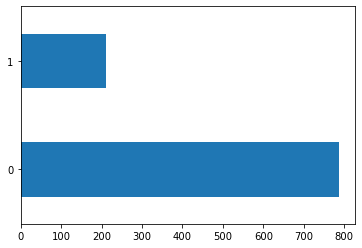

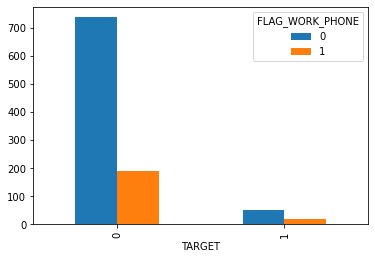

In [73]:
x['FLAG_WORK_PHONE'].value_counts().plot.barh();
display(x.groupby('TARGET')['FLAG_WORK_PHONE'].value_counts().unstack())
x.groupby('TARGET')['FLAG_WORK_PHONE'].value_counts().unstack().plot.bar();

元比率と変わらない結果

#### FLAG_CONT_MOBILE

FLAG_CONT_MOBILE,0,1
TARGET,,
0,3.0,927.0
1,NaN,70.0


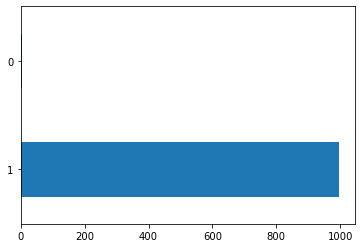

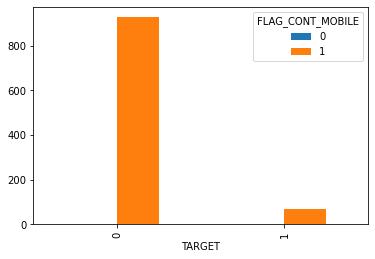

In [74]:
x['FLAG_CONT_MOBILE'].value_counts().plot.barh();
display(x.groupby('TARGET')['FLAG_CONT_MOBILE'].value_counts().unstack())
x.groupby('TARGET')['FLAG_CONT_MOBILE'].value_counts().unstack().plot.bar();

データ偏りすぎて、必要なかったデータ


#### FLAG_PHONE

FLAG_PHONE,0,1
TARGET,,
0,652,278
1,51,19


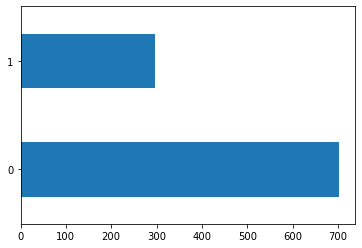

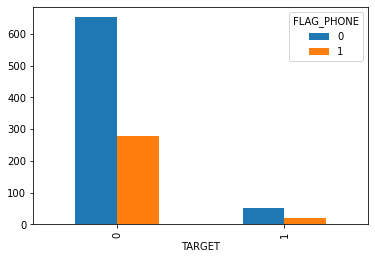

In [75]:
x['FLAG_PHONE'].value_counts().plot.barh();
display(x.groupby('TARGET')['FLAG_PHONE'].value_counts().unstack())
x.groupby('TARGET')['FLAG_PHONE'].value_counts().unstack().plot.bar();

元比率と変わらない結果

#### FLAG_EMAIL

FLAG_EMAIL,0,1
TARGET,,
0,870,60
1,66,4


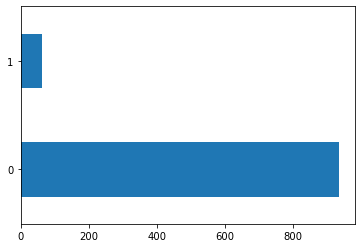

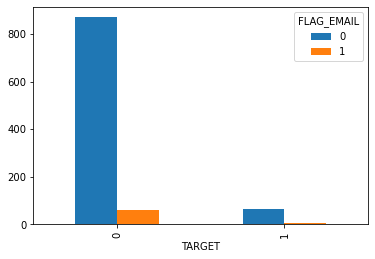

In [76]:
x['FLAG_EMAIL'].value_counts().plot.barh();
display(x.groupby('TARGET')['FLAG_EMAIL'].value_counts().unstack())
x.groupby('TARGET')['FLAG_EMAIL'].value_counts().unstack().plot.bar();

元比率と変わらない

#### CNT_FAM_MEMBERS

CNT_FAM_MEMBERS,1.0,2.0,3.0,4.0,5.0
TARGET,,,,,
0,216,484,134,85,11
1,21,29,12,7,1


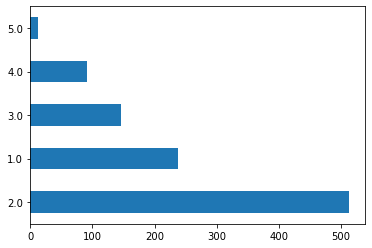

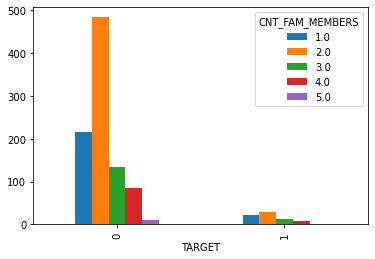

In [77]:
x['CNT_FAM_MEMBERS'].value_counts().plot.barh();
display(x.groupby('TARGET')['CNT_FAM_MEMBERS'].value_counts().unstack())
x.groupby('TARGET')['CNT_FAM_MEMBERS'].value_counts().unstack().plot.bar();

家族構成の割合  
2で比率が違うのは結婚率と関係が深い

#### REGION_RATING_CLIENT

REGION_RATING_CLIENT,1,2,3
TARGET,,,
0,96,705,129
1,5,51,14


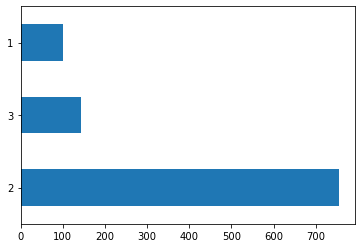

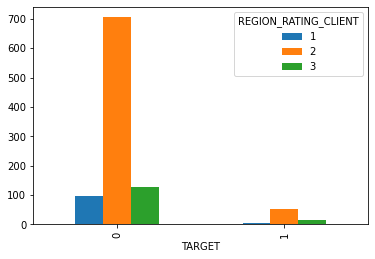

In [78]:
x['REGION_RATING_CLIENT'].value_counts().plot.barh();
display(x.groupby('TARGET')['REGION_RATING_CLIENT'].value_counts().unstack())
x.groupby('TARGET')['REGION_RATING_CLIENT'].value_counts().unstack().plot.bar();

住所のレート  
関係あるかと思ったが、ほぼほぼ関係ないかも

#### WEEKDAY_APPR_PROCESS_START

WEEKDAY_APPR_PROCESS_START,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY
TARGET,,,,,,,
0,175,131,102,46,167,160,149
1,7,10,9,4,12,11,17


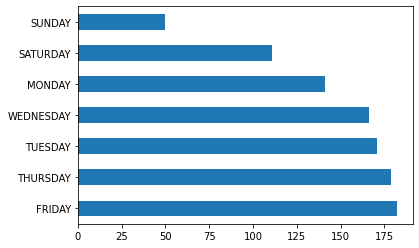

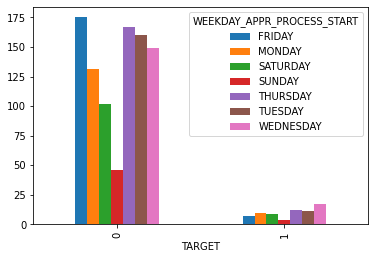

In [79]:
x['WEEKDAY_APPR_PROCESS_START'].value_counts().plot.barh();
display(x.groupby('TARGET')['WEEKDAY_APPR_PROCESS_START'].value_counts().unstack())
x.groupby('TARGET')['WEEKDAY_APPR_PROCESS_START'].value_counts().unstack().plot.bar();

何曜日に借りたかのグラフ、いらないかな

#### HOUR_APPR_PROCESS_START

HOUR_APPR_PROCESS_START,1,3,4,5,6,7,8,9,10,11,...,13,14,15,16,17,18,19,20,21,22
TARGET,,,,,,,,,,,,,,,,,,,,,
0,NaN,5.0,5.0,9.0,22.0,28.0,56.0,82.0,123.0,103.0,...,79.0,80.0,78.0,69.0,55.0,22.0,7.0,4.0,1.0,1.0
1,1.0,NaN,NaN,2.0,2.0,1.0,4.0,7.0,17.0,8.0,...,2.0,8.0,4.0,3.0,1.0,3.0,2.0,NaN,NaN,NaN


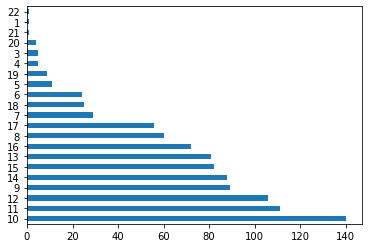

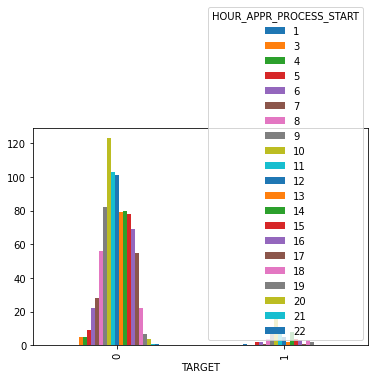

In [80]:
x['HOUR_APPR_PROCESS_START'].value_counts().plot.barh();
display(x.groupby('TARGET')['HOUR_APPR_PROCESS_START'].value_counts().unstack())
x.groupby('TARGET')['HOUR_APPR_PROCESS_START'].value_counts().unstack().plot.bar();

ちょっとぐちゃってるけど借金をした時間帯
関係ないので割愛


#### REG_REGION_NOT_LIVE_REGION

REG_REGION_NOT_LIVE_REGION,0,1
TARGET,,
0,915,15
1,67,3


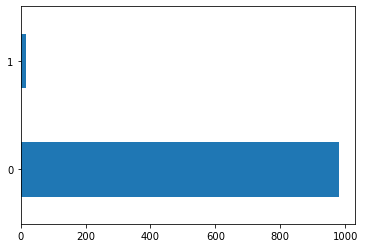

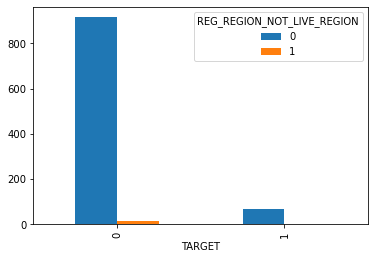

In [81]:
x['REG_REGION_NOT_LIVE_REGION'].value_counts().plot.barh();
display(x.groupby('TARGET')['REG_REGION_NOT_LIVE_REGION'].value_counts().unstack())
x.groupby('TARGET')['REG_REGION_NOT_LIVE_REGION'].value_counts().unstack().plot.bar();

住所が変わった人？
サンプル少ないけど、比率は変わらないかな

#### REG_REGION_NOT_WORK_REGION

REG_REGION_NOT_WORK_REGION,0,1
TARGET,,
0,879,51
1,64,6


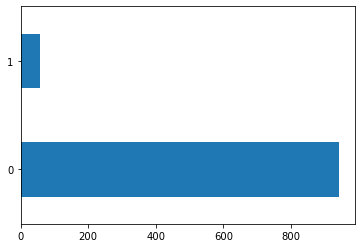

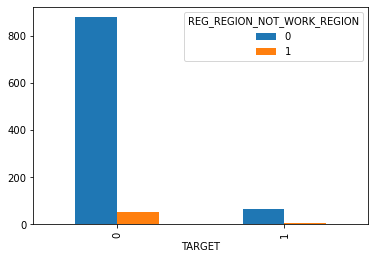

In [82]:
x['REG_REGION_NOT_WORK_REGION'].value_counts().plot.barh();
display(x.groupby('TARGET')['REG_REGION_NOT_WORK_REGION'].value_counts().unstack())
x.groupby('TARGET')['REG_REGION_NOT_WORK_REGION'].value_counts().unstack().plot.bar();

#### REG_CITY_NOT_LIVE_CITY

REG_CITY_NOT_LIVE_CITY,0,1
TARGET,,
0,853,77
1,63,7


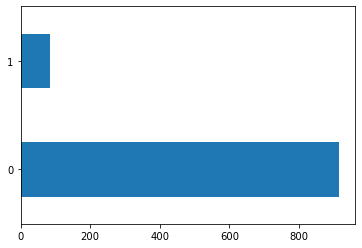

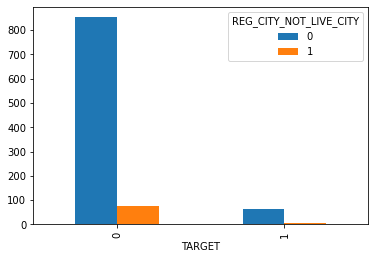

In [83]:
x['REG_CITY_NOT_LIVE_CITY'].value_counts().plot.barh();
display(x.groupby('TARGET')['REG_CITY_NOT_LIVE_CITY'].value_counts().unstack())
x.groupby('TARGET')['REG_CITY_NOT_LIVE_CITY'].value_counts().unstack().plot.bar();

#### ORGANIZATION_TYPE

ORGANIZATION_TYPE,Advertising,Agriculture,Bank,Business Entity Type 1,Business Entity Type 2,Business Entity Type 3,Construction,Culture,Electricity,Emergency,...,Trade: type 2,Trade: type 3,Trade: type 6,Trade: type 7,Transport: type 1,Transport: type 2,Transport: type 3,Transport: type 4,University,XNA
TARGET,,,,,,,,,,,,,,,,,,,,,
0,NaN,8.0,7.0,15.0,37.0,209.0,17.0,1.0,5.0,4.0,...,7.0,15.0,3.0,18.0,2.0,9.0,7.0,21.0,2.0,148.0
1,1.0,1.0,NaN,NaN,NaN,22.0,1.0,NaN,NaN,NaN,...,1.0,3.0,NaN,1.0,NaN,2.0,NaN,1.0,NaN,10.0


<Figure size 1080x720 with 0 Axes>

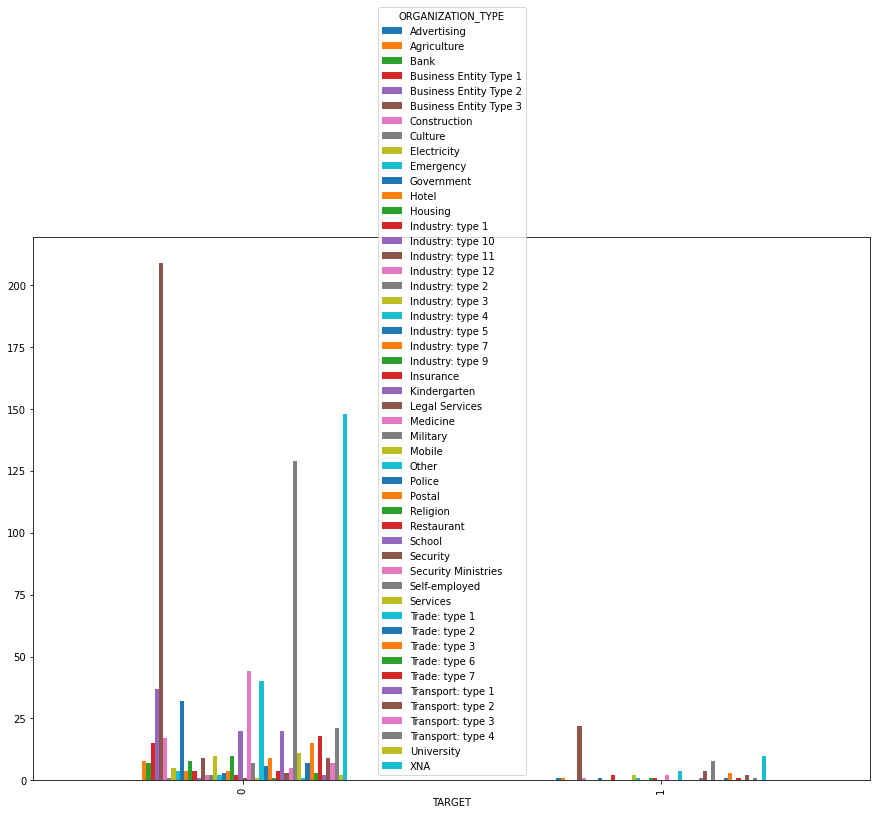

In [89]:
display(x.groupby('TARGET')['ORGANIZATION_TYPE'].value_counts().unstack())
x.groupby('TARGET')['ORGANIZATION_TYPE'].value_counts().unstack().plot.bar(figsize=(15, 10));

母数が少ないのでなんとも
職業と目的変数との関わりは少なそうにみえる
ダミー変数作るの大変そう

### 分布データ

分布データ　8項目
- AMT_INCOME_TOTAL
- AMT_CREDIT
- REGION_POPULATION_RELATIVE
- DAYS_BIRTH
- DAYS_EMPLOYED
- DAYS_REGISTRATION
- DAYS_ID_PUBLISH
- DAYS_LAST_PHONE_CHANGE 

#### AMT_INCOME_TOTAL

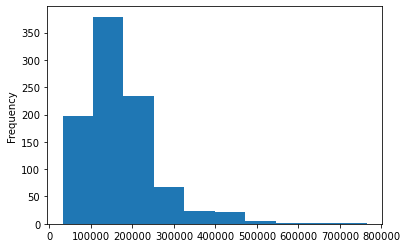

In [110]:
x.query('TARGET == 0')['AMT_INCOME_TOTAL'].plot.hist();

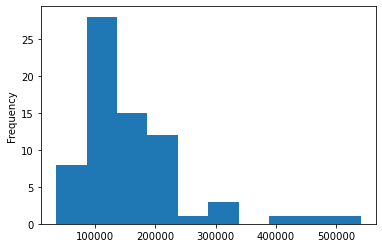

In [108]:
x.query('TARGET == 1')['AMT_INCOME_TOTAL'].plot.hist();

今までの収入額分布  
目的変数によらず、同じ分布をとりそう  
収入系なので対数変換して正規分布にしてあげてもよさそう  

#### AMT_CREDIT

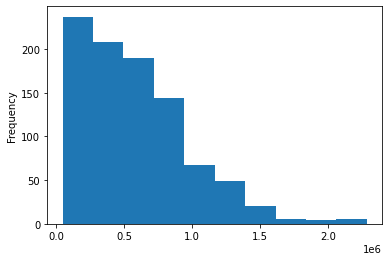

In [112]:
x.query('TARGET == 0')['AMT_CREDIT'].plot.hist();

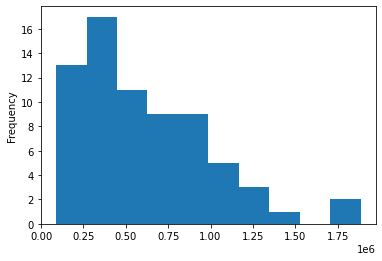

In [113]:
x.query('TARGET == 1')['AMT_CREDIT'].plot.hist();

借用額で見ると若干弾かれている人たちは借入額は大きい様に伺える  
いい特徴量として使えそう

#### REGION_POPULATION_RELATIVE

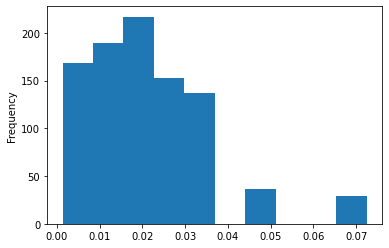

In [119]:
x.query('TARGET == 0')['REGION_POPULATION_RELATIVE'].plot.hist();

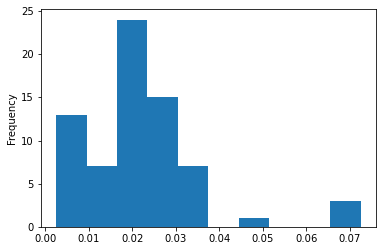

In [118]:
x.query('TARGET == 1')['REGION_POPULATION_RELATIVE'].plot.hist();

住んでる街の人口　　
若干違う気もするけど誤差な気もする
直接関係は感覚的にはなさそう


#### DAYS_BIRTH

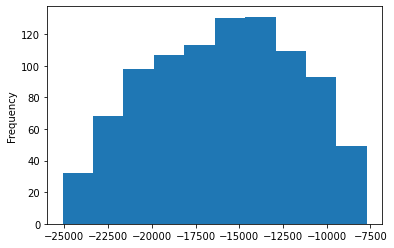

In [122]:
x.query('TARGET == 0')['DAYS_BIRTH'].plot.hist();

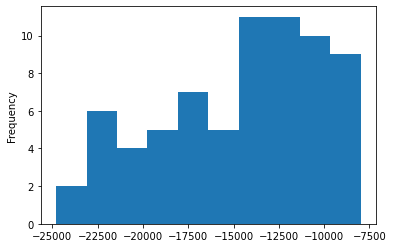

In [123]:
x.query('TARGET == 1')['DAYS_BIRTH'].plot.hist();

申込日の何日前に生まれたか  
謎の表記方法をしているせいでちょっとわかりずらい+加工が必要そう  
また、かなり差が見られるので特徴量になりそう

#### DAYS_EMPLOYED

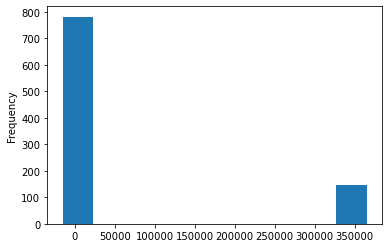

In [127]:
x.query('TARGET == 0')['DAYS_EMPLOYED'].plot.hist();

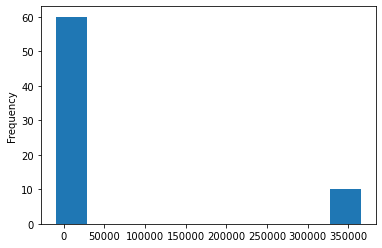

In [128]:
x.query('TARGET == 1')['DAYS_EMPLOYED'].plot.hist();

謎の分布　入力ミスでないのなら365243は仕事をしてない人になるのかな
それにしても偏りすぎている気もする

#### DAYS_REGISTRATION

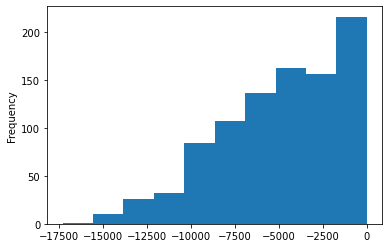

In [129]:
x.query('TARGET == 0')['DAYS_REGISTRATION'].plot.hist();

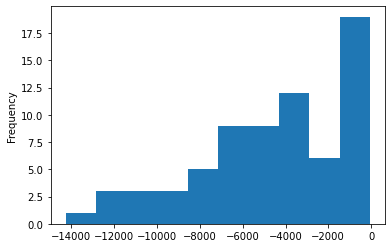

In [130]:
x.query('TARGET == 1')['DAYS_REGISTRATION'].plot.hist();

クライアントが借入申請日の何日前に登録情報を更新したか  
分布はそこまでかわらないかな

#### DAYS_ID_PUBLISH

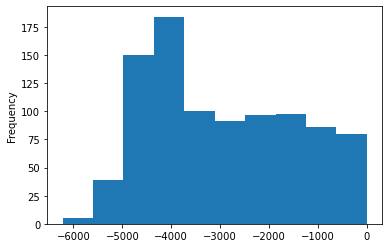

In [131]:
x.query('TARGET == 0')['DAYS_ID_PUBLISH'].plot.hist();

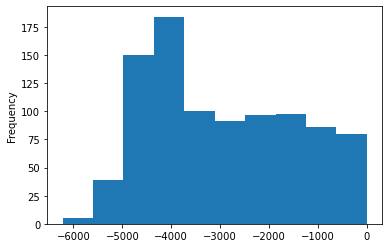

In [132]:
x.query('TARGET == 0')['DAYS_ID_PUBLISH'].plot.hist();

申し込みの何日前に、ローンを申し込む際の身分証明書を作成、変更したか  
分布は変わらなそう

#### DAYS_LAST_PHONE_CHANGE

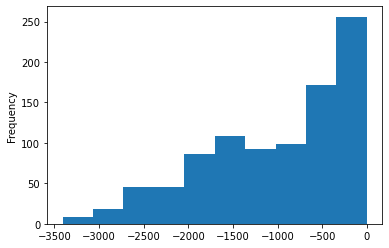

In [133]:
x.query('TARGET == 0')['DAYS_LAST_PHONE_CHANGE'].plot.hist();

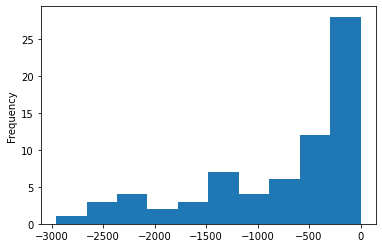

In [134]:
x.query('TARGET == 1')['DAYS_LAST_PHONE_CHANGE'].plot.hist();

申し込みの何日前に、携帯電話を買えたか  
違法なことがないかぎり変わらなそう